In [21]:
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import re
import random 
import collections
# use multiprocessing for multicore ops

In [13]:
data1 = pd.read_csv("../data/questions.csv", delimiter=',', encoding="utf-8-sig")
print(data1.shape)
print(data1.iloc[0:1,3:])
#random.shuffle(data1)

(404351, 6)
                                           question1  \
0  What is the step by step guide to invest in sh...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  


In [38]:
subset = data1.iloc[0:100,3:]
subset
#subset = subset.loc[subset.is_duplicate==0,['question1','question2']]


,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,How can I be a good geologist?,What should I do to be a great geologist?,1
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [39]:
#nltk.download()
from nltk.corpus import stopwords # Import the stop word list
print(stopwords.words("english")) 


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [40]:
def question_to_words( raw_quest ):
    lemmetizer = nltk.WordNetLemmatizer()
    letters_only = re.sub("[^a-zA-Z]", " ", raw_quest) 
    letters_only = letters_only.lower()
    words = nltk.word_tokenize(letters_only)
    #words = nltk.word_tokenize(s)
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops]
    meaningful_words = [lemmetizer.lemmatize(w) for w in meaningful_words]
    return( " ".join( meaningful_words ))

In [41]:
subset['question1']= subset['question1'].apply(question_to_words)
subset['question2']= subset['question2'].apply(question_to_words)

In [42]:

X = subset.iloc[:,0:-1]
X
y = subset.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [43]:
X_train

,question1,question2
1,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...
51,blu ray play regular dvd player,play blu ray dvd regular dvd player
16,manipulation mean,manipulation mean
94,abstract expressionism painting,major influence abstract expressionism
50,career launcher good rbi grade b preparation,career launcher online program rbi grade b
69,cost much privacy germany come else lost gain ...,people genuinely enjoy salad dressing
87,difference sincerity fairness,difference honest sincere
39,stall speed aoa f wing fully swept back,aircraft stop using variable sweep wing like f
26,web application,web application framework
3,mentally lonely solve,find remainder math math divided


In [44]:
#nums = X_train["question1"].size
q1 = X_train["question1"][0]
#df_q1 = X_train["question1"].apply(question_to_words)
#df_q2 = X_train["question2"].apply(question_to_words)
#df_q2
#df_q1[1]
print(q1)
dict(collections.Counter(q1))


step step guide invest share market india


{' ': 6,
 'a': 3,
 'd': 2,
 'e': 6,
 'g': 1,
 'h': 1,
 'i': 4,
 'k': 1,
 'm': 1,
 'n': 2,
 'p': 2,
 'r': 2,
 's': 4,
 't': 4,
 'u': 1,
 'v': 1}

In [28]:
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

Creating the bag of words...



In [29]:
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

In [47]:
corpus = subset["question1"] + " " + subset["question2"]
cv = vectorizer.fit(corpus)
# Calculate the mean absolute error of your Random Forest model on the validation data
#val_prediction_rf = rf_model.predict(X_test)

cv
from sklearn.metrics.pairwise import cosine_similarity


In [24]:

r,c = subset.shape
final_vec = []
for j in range(r):
    a = cv.transform([subset.iloc[j].question1])
    b = cv.transform([subset.iloc[j].question2])
    sim = round(cosine_similarity(a,b).ravel()[0], 3)
    #print(round(cosine_similarity(a,b).ravel()[0], 3))
    #final_vec.append((round(cosine_similarity(a,b).ravel()[0], 3),subset.iloc[j].is_duplicate))
    #cos_sim.append(cosine_similarity(a,b).ravel()[0])
    #print(str(cos_sim[j]) + " " + str(subset.iloc[j].is_duplicate)) 
    final_vec.append(sim)

df1 = pd.DataFrame({'cos_sim':final_vec})
#df1 = df1 + 
df2 = subset['is_duplicate']
df2
#df1 = pd.concat([df1,df2],axis=1 )
X = df1
y = df2

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus
#!pip3 install pydotplus
import pydotplus


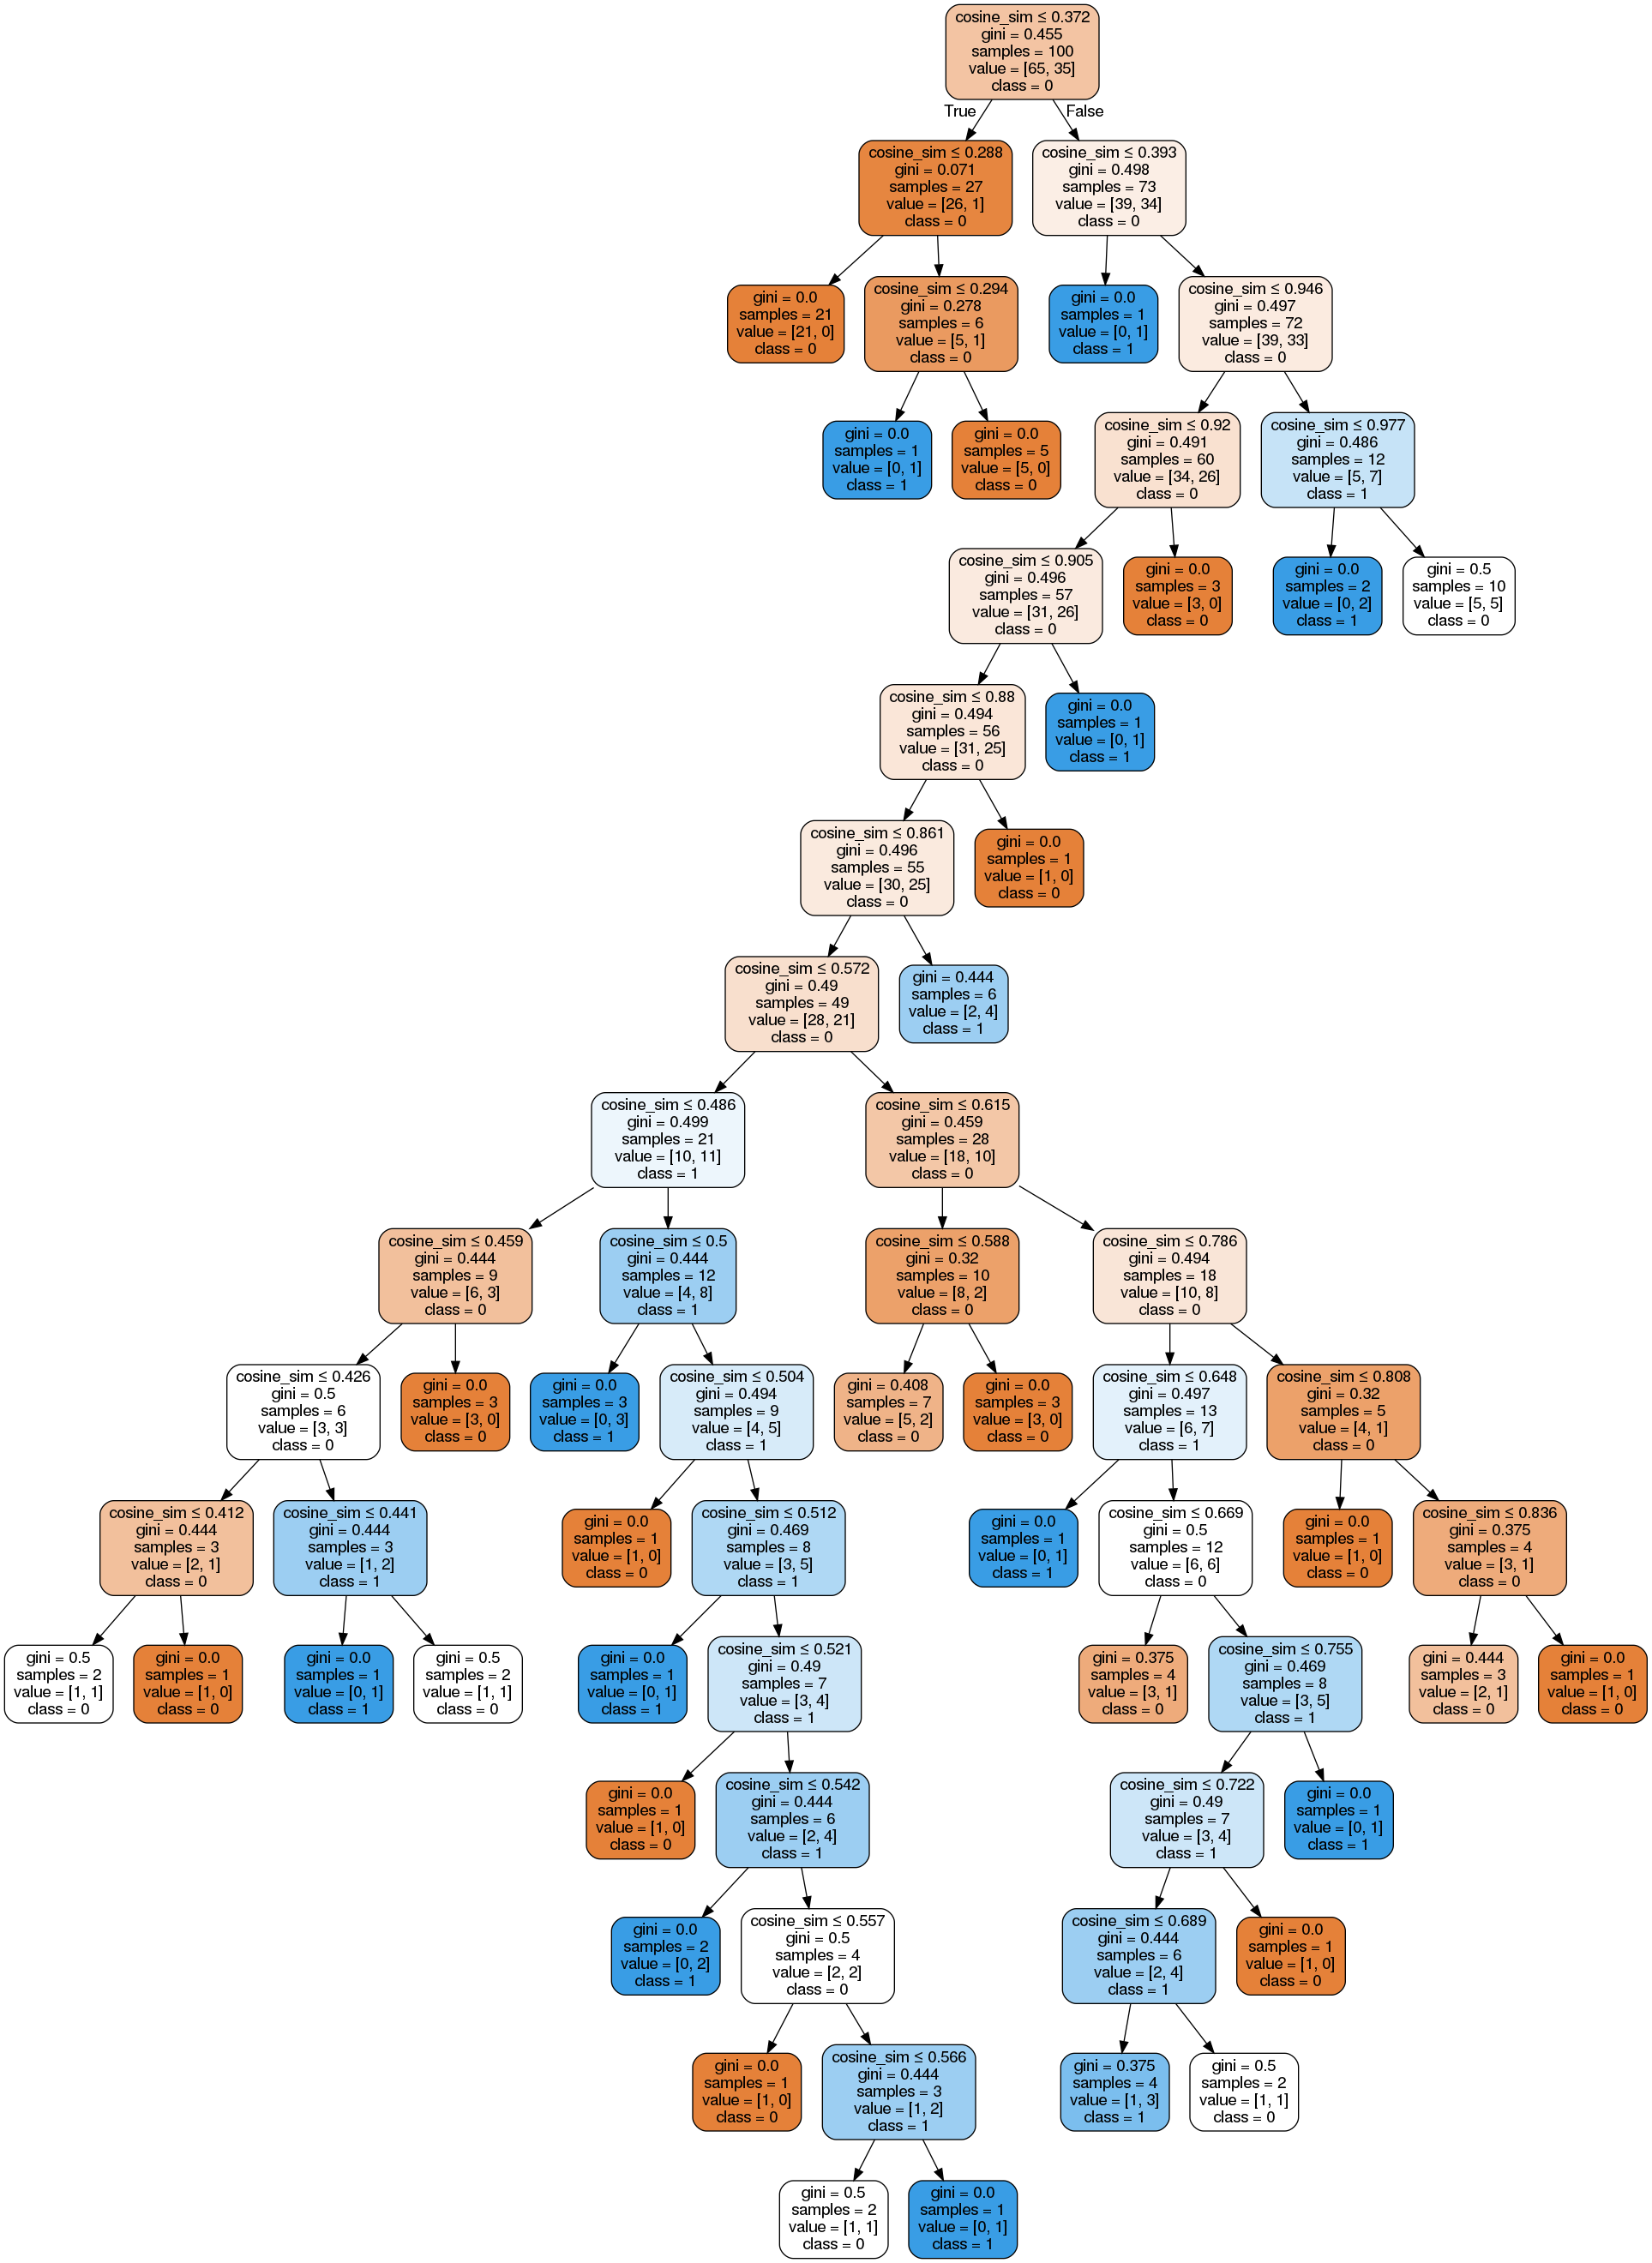

In [28]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['cosine_sim'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('question_pair.png')
Image(graph.create_png())